In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

## 读取数据集并把图片降维

In [3]:
#import data and create labels testing

paths=[]
labels=[]
images = []
for pathname, dirname, filenames in os.walk('./dataset'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            paths+=[os.path.join(pathname, filename)]
            img = cv2.imread(os.path.join(pathname, filename))
            #图像降低成一维
            img_1 = img.flatten()
            images.append(img_1)
            #labels+=[pathname.split('/')[-1]]
            labels.append(pathname.split('/')[-1])
            


In [4]:

data_df=pd.DataFrame(columns=['path','label','image'])
data_df['path']=paths
data_df['label']=labels
data_df['image']=images

#display(data_df['label'].value_counts())
data_np = np.array(data_df)

In [5]:
images_np = np.array(data_df['image'].tolist())

In [6]:
labels_np = np.array(data_df['label'].tolist())

## 划分训练集和测试集

In [7]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(images_np,labels_np, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(356, 27648)
(89, 27648)
(356,)
(89,)


## 随机森林实现图像分类并打印准确率

In [17]:
rfc = RandomForestClassifier(oob_score=True,random_state=66)
rfc.fit(x_train,y_train)
print(rfc.oob_score_)
print("accuracy:%f"%rfc.oob_score_)

0.6685393258426966
accuracy:0.668539


## 随机森林调参过程

In [10]:
#调参
x = images_np
y = labels_np
RF = RandomForestClassifier(random_state = 66)
score = cross_val_score(RF,x,y,cv=6).mean()
print('基尼系数得分: %.4f'%score)
RF = RandomForestClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(RF,x,y,cv=6).mean()
print('熵得分: %.4f'%score)


基尼系数得分: 0.6899
熵得分: 0.7101


最优参数以及最高得分: [190.           0.71021021]


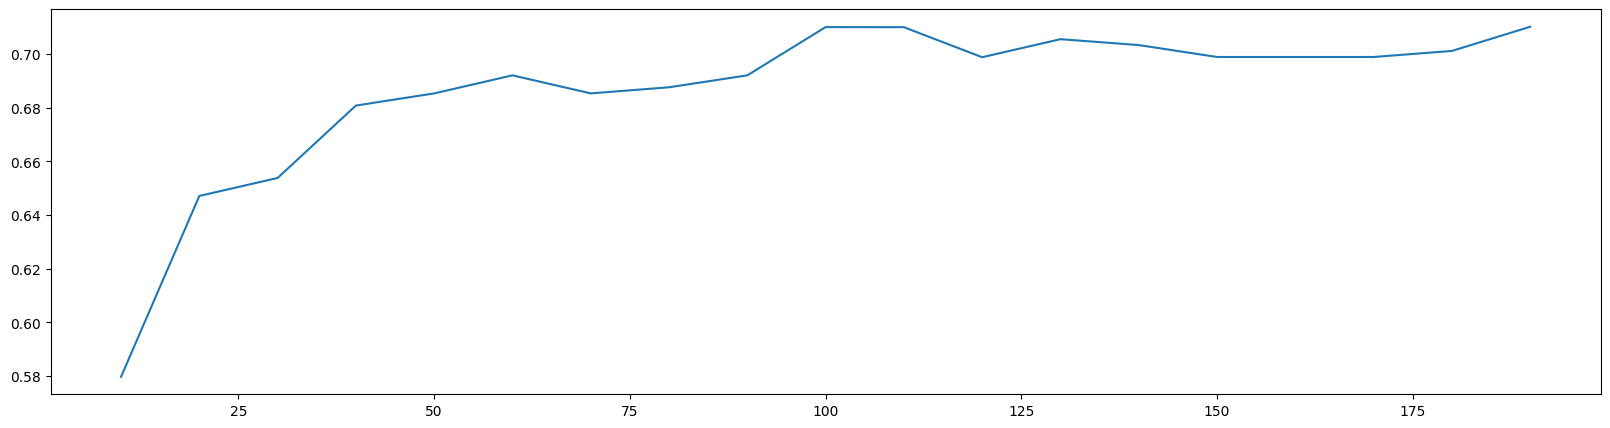

In [11]:
###调n_estimators参数
ScoreAll = []
for i in range(10,200,10):
    DT = RandomForestClassifier(n_estimators = i,random_state = 66,criterion = 'entropy')
    score = cross_val_score(DT,x,y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()


最优参数以及最高得分: [189.           0.71021021]


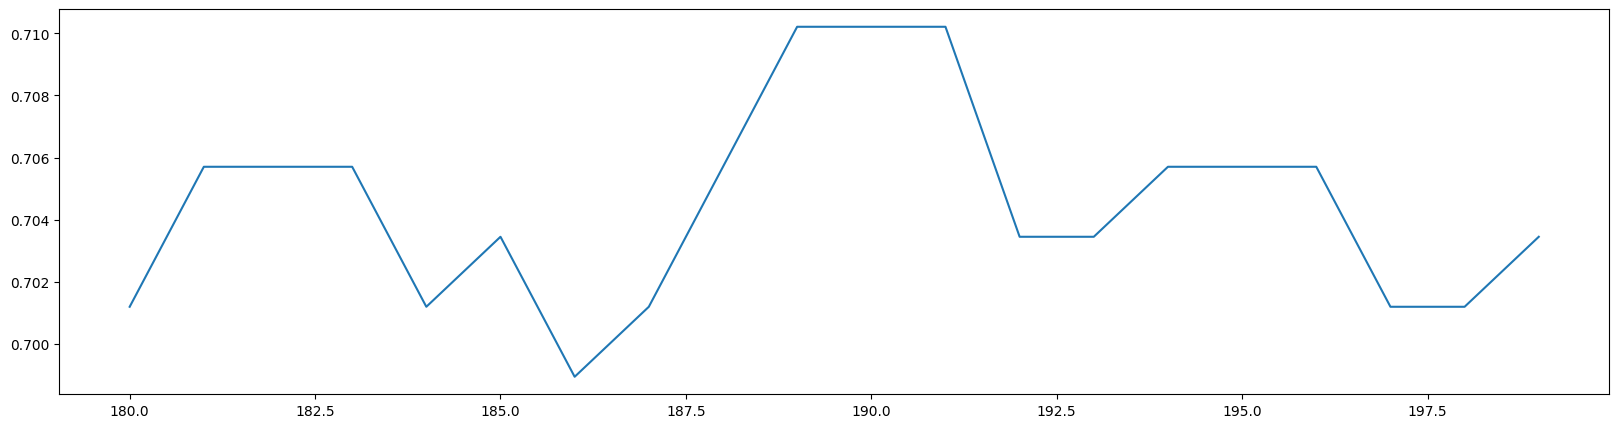

In [16]:
###进一步缩小范围，调n_estimators参数
ScoreAll = []
for i in range(180,200):
    DT = RandomForestClassifier(n_estimators = i,random_state = 66, criterion = 'entropy')
    score = cross_val_score(DT,x,y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()


最优参数以及最高得分: [13.          0.71021021]


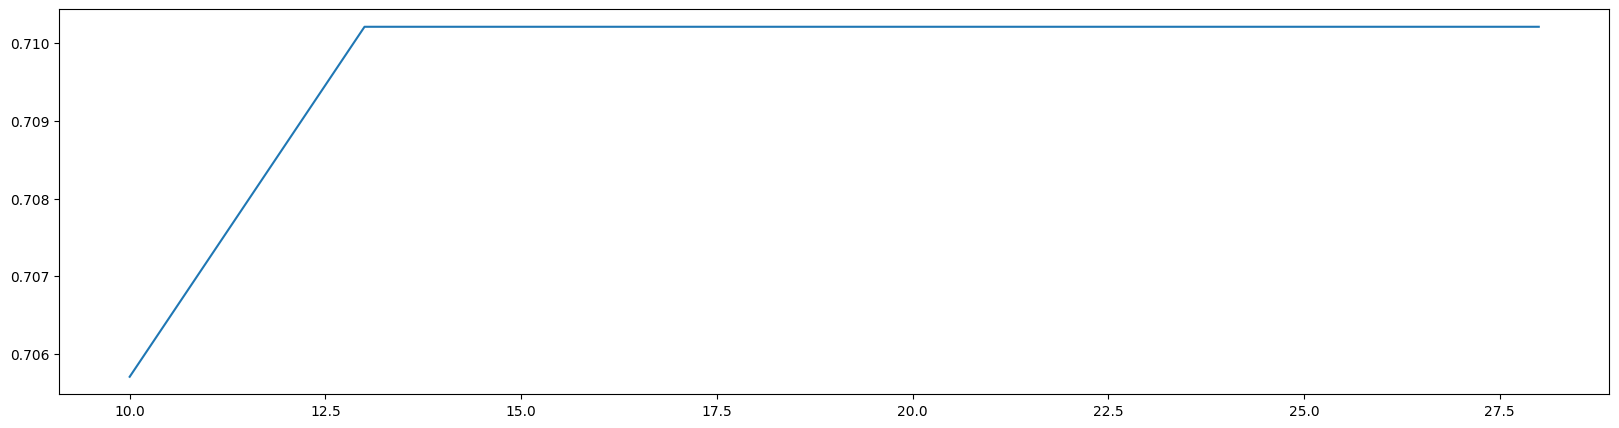

In [18]:
###粗调max_depth参数
ScoreAll = []
for i in range(10,30,3):
    DT = RandomForestClassifier(n_estimators = 189,random_state = 66,max_depth =i ,criterion = 'entropy')
    score = cross_val_score(DT,x,y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()


最优参数以及最高得分: [5.        0.7124024]


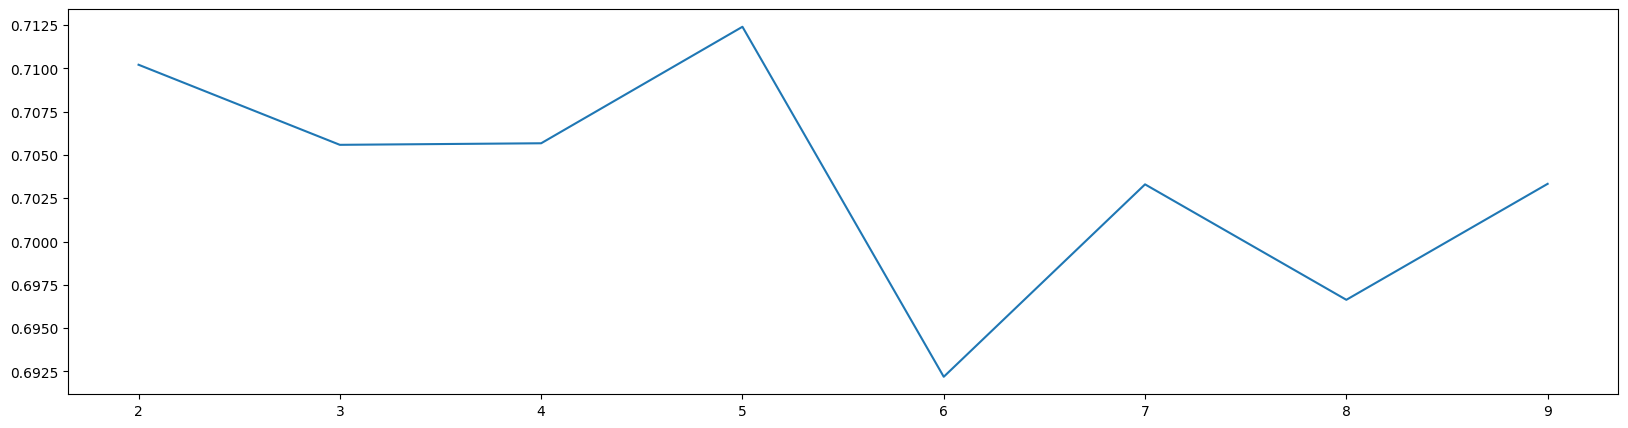

In [21]:
###调min_samples_split参数
ScoreAll = []
for i in range(2,10):
    RF = RandomForestClassifier(n_estimators = 189,random_state = 66,max_depth =13,min_samples_split = i ,criterion = 'entropy')
    score = cross_val_score(RF,x,y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()


最优参数以及最高得分: [1.        0.7124024]


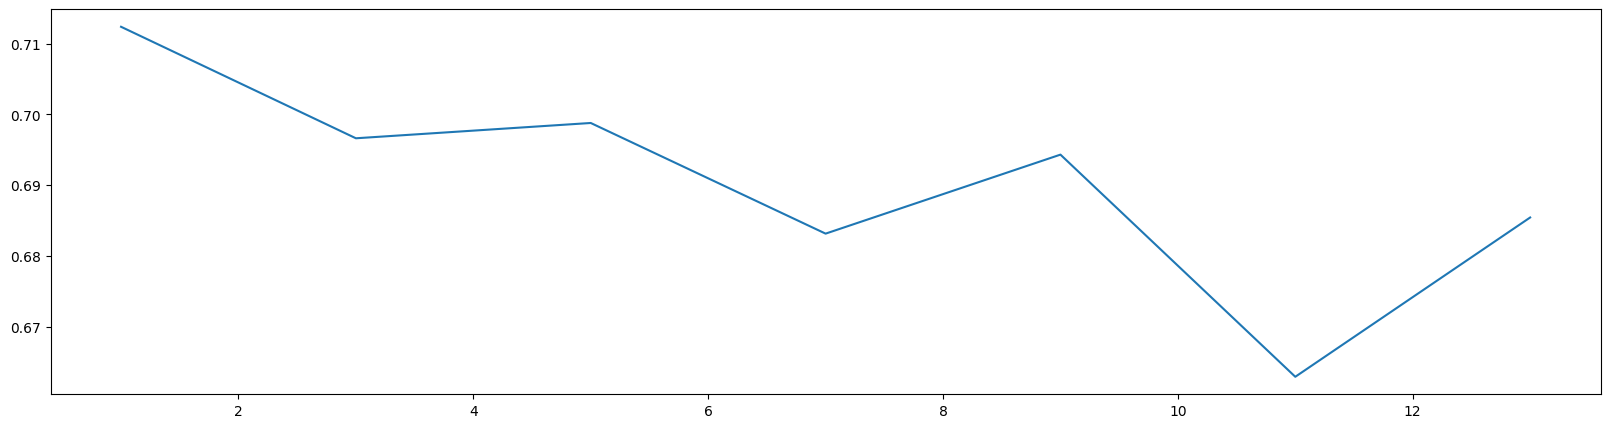

In [23]:
###调min_samples_leaf参数
ScoreAll = []
for i in range(1,15,2):
    DT = RandomForestClassifier(n_estimators = 189,random_state = 66,max_depth =13,min_samples_leaf = i,min_samples_split = 5 ,criterion = 'entropy') 
    score = cross_val_score(DT,x,y,cv=6).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()
